In [42]:
## Jahre mitteln

In [43]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import time, datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from scipy.optimize import curve_fit

%matplotlib inline

In [44]:
df = pd.read_csv("berlinerstraße1519.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

In [45]:
my_date_range = pd.date_range('01-01-2015 00:00:00', periods = 87795, freq="30min", closed = "right")
df = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df["NO2 (µg/m³)"],"Globalstrahlung (W/m²)": df["Globalstrahlung (W/m²)"],  "Temperatur (°C)": df["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df["Windgeschwindigkeit (m/s)"], "Windrichtung (°)": df["Windrichtung (°)"]}) 

df["day"] = df["Time"].dt.date
df["month"]=df["Time"].dt.month
df["hour"] = df["Time"].dt.time
df['date'] = df['Time'].dt.strftime('%m-%d %H:%M-%S')


In [46]:
grouped_year= df.groupby("date")
df_year= grouped_year.mean()

In [47]:
df_year

,NO2 (µg/m³),Globalstrahlung (W/m²),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),month
date,,,,,,
01-01 00:00-00,27.560000,7.400000,2.960000,0.960000,149.200000,1
01-01 00:30-00,28.566667,6.333333,2.400000,0.850000,214.166667,1
01-01 01:00-00,28.833333,6.333333,2.066667,0.750000,190.666667,1
01-01 01:30-00,26.700000,6.500000,2.016667,0.966667,184.333333,1
01-01 02:00-00,25.440000,6.333333,1.866667,0.983333,134.666667,1
...,...,...,...,...,...,...
12-31 21:30-00,26.420000,7.400000,2.820000,0.760000,172.800000,12
12-31 22:00-00,26.680000,7.400000,2.740000,0.960000,172.400000,12
12-31 22:30-00,28.000000,7.400000,2.600000,0.840000,173.200000,12


In [48]:
df_year.describe()

,NO2 (µg/m³),Globalstrahlung (W/m²),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),month
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000
mean,23.856038,134.765246,12.669646,1.221944,194.126662,6.513661
std,8.851567,194.443121,7.256919,0.389172,40.731931,3.451332
min,4.775000,5.000000,-2.240000,0.280000,57.400000,1.000000
25%,17.060000,7.000000,6.220000,0.940000,165.362500,4.000000
50%,22.580000,15.200000,11.960000,1.180000,191.600000,7.000000
75%,29.540000,203.850000,18.540000,1.460000,221.050000,10.000000
max,63.500000,882.200000,30.960000,3.020000,358.000000,12.000000


<AxesSubplot:xlabel='date'>

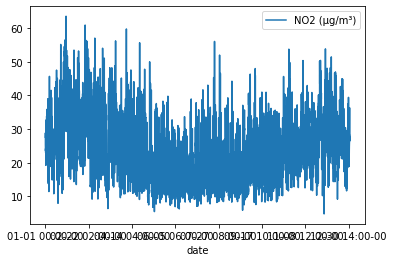

In [49]:
df_year.plot( y="NO2 (µg/m³)")

In [50]:
df_roll=df_year.rolling(192).min() #4 Tage

<AxesSubplot:xlabel='date'>

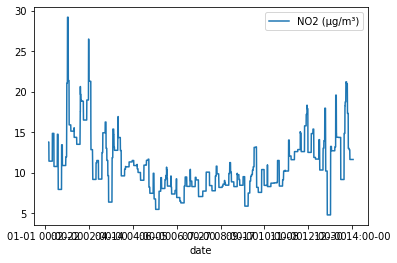

In [51]:
df_roll.plot(y="NO2 (µg/m³)")

<AxesSubplot:xlabel='date'>

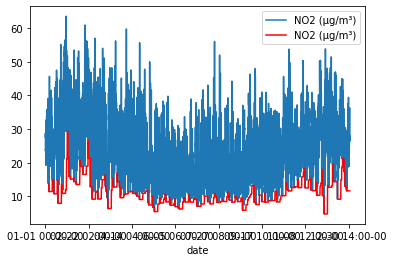

In [52]:
ax=df_year.plot( y="NO2 (µg/m³)")
df_roll.plot(y="NO2 (µg/m³)", c="red", ax=ax)

In [53]:
my_date_range = pd.date_range('2019-12-31 23:30:00', periods = 17569, freq="30min", closed = "right")
df_sep = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_year["NO2 (µg/m³)"], "Globalstrahlung (W/m²)": df_year["Globalstrahlung (W/m²)"], "Temperatur (°C)": df_year["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_year["Windgeschwindigkeit (m/s)"], "Windrichtung (°)": df_year["Windrichtung (°)"]}) 
df_sep["hour"] = df_sep["Time"].dt.time
df_sep["uhrzeit"] = df_sep["Time"].dt.hour
#df_sep['Time'].dt.strftime('%H:%M:%S')
#df_sep["uhrzeit"]=df_sep['Time'].dt.strftime('%H:%M:%S')

In [54]:
#df_sep["time"] = pd.to_datetime(df_sep["hour"], format="%H:%M:%S")

In [55]:
df_sep

,Time,NO2 (µg/m³),Globalstrahlung (W/m²),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),hour,uhrzeit
date,,,,,,,,
01-01 00:00-00,2020-01-01 00:00:00,27.560000,7.400000,2.960000,0.960000,149.200000,00:00:00,0
01-01 00:30-00,2020-01-01 00:30:00,28.566667,6.333333,2.400000,0.850000,214.166667,00:30:00,0
01-01 01:00-00,2020-01-01 01:00:00,28.833333,6.333333,2.066667,0.750000,190.666667,01:00:00,1
01-01 01:30-00,2020-01-01 01:30:00,26.700000,6.500000,2.016667,0.966667,184.333333,01:30:00,1
01-01 02:00-00,2020-01-01 02:00:00,25.440000,6.333333,1.866667,0.983333,134.666667,02:00:00,2
...,...,...,...,...,...,...,...,...
12-31 21:30-00,2020-12-31 21:30:00,26.420000,7.400000,2.820000,0.760000,172.800000,21:30:00,21
12-31 22:00-00,2020-12-31 22:00:00,26.680000,7.400000,2.740000,0.960000,172.400000,22:00:00,22
12-31 22:30-00,2020-12-31 22:30:00,28.000000,7.400000,2.600000,0.840000,173.200000,22:30:00,22


In [56]:
#df_sep_hour=df_sep.resample("H").mean()

In [57]:
# aufteilen in 4 seasons

# spring
mask_spring = (df_sep['Time'] >= '2020-03-1 00:00:00') & (df_sep['Time'] <= '2020-05-31 23:30:00')
df_spring=df_sep.loc[mask_spring]
df_spring.to_csv("spring.csv")
# summer
mask_summer = (df_sep['Time'] >= '2020-06-1 00:00:00') & (df_sep['Time'] <= '2020-08-31 23:30:00')
df_summer=df_sep.loc[mask_summer]
# autumn
mask_autumn = (df_sep['Time'] >= '2020-09-1 00:00:00') & (df_sep['Time'] <= '2020-11-30 23:30:00')
df_autumn=df_sep.loc[mask_autumn]
# winter
mask_winter1 = (df_sep['Time'] >= '2020-12-1 00:00:00')& (df_sep['Time'] <= '2020-12-31 23:30:00') 
mask_winter2= (df_sep['Time']>='2020-01-1 00:00:00') & (df_sep['Time'] <= '2020-02-28 23:30:00')
df_winter1=df_sep.loc[mask_winter1]
df_winter2=df_sep.loc[mask_winter2]
df_winter= df_winter2.append([df_winter1])

In [58]:
# definitionen

def filter_nans(data):
    return np.ma.array(data, mask=np.isnan(data))

def count_nans(data):
    print(np.isnan(data).astype(int).sum())
    
def linear(x, a, b):
    return a*x+b

def quad(x, a, b, c):
    return a*x**2+b*x+c

def linear_error(x, cov):
    grad_y = np.array([x, 1])
    delta_y = np.sqrt(grad_y.dot((cov@grad_y)))
    return delta_y


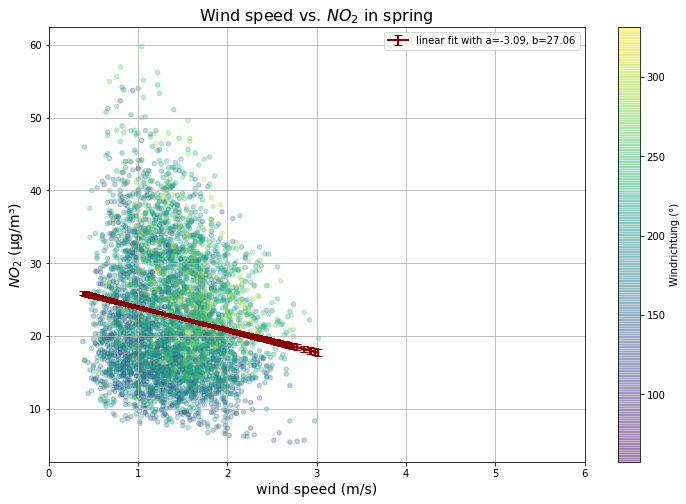

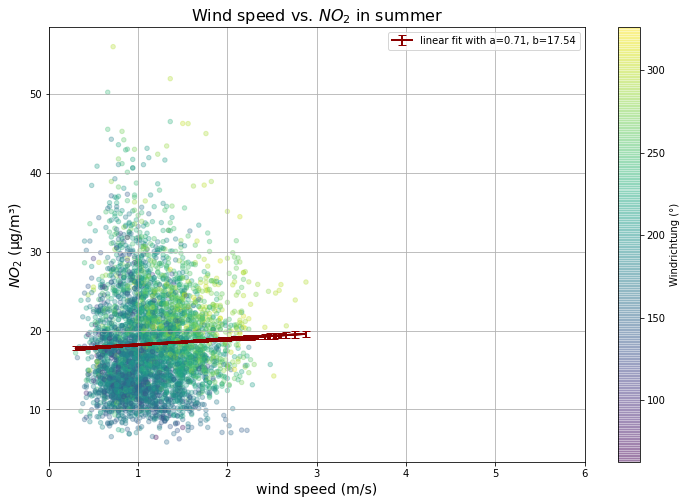

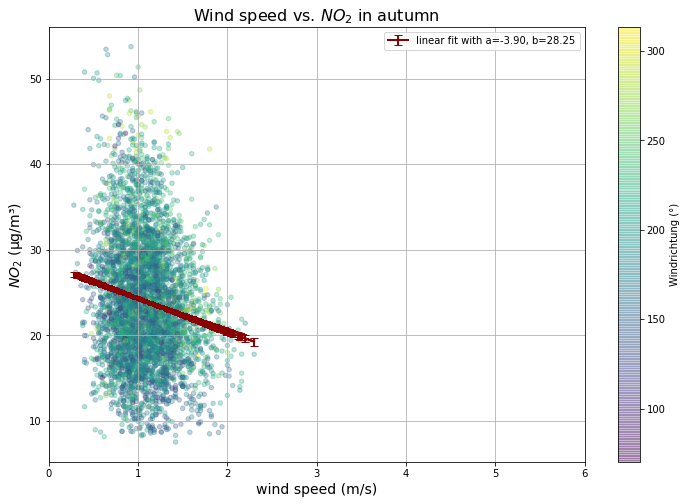

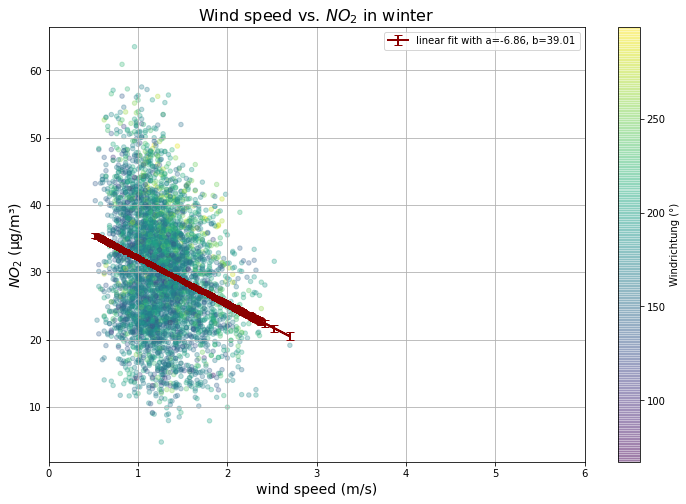

In [59]:
# wind vs. NO2 für seasons



x = df_spring["Windgeschwindigkeit (m/s)"]
y = df_spring["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_spring.plot.scatter(grid=True, x="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
ax.set_xlabel('wind speed (m/s)', fontsize=14)
ax.set_ylabel('$NO_{2}$ (µg/m³)', fontsize=14)
ax.set_xlim(0,6.0)
plt.legend()
plt.title("Wind speed vs. $NO_{2}$ in spring", fontsize=16)
plt.savefig("linearfitwindspeedno2spring")

x = df_summer["Windgeschwindigkeit (m/s)"]
y = df_summer["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_summer.plot.scatter(grid=True, x="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
ax.set_xlabel('wind speed (m/s)', fontsize=14)
ax.set_ylabel('$NO_{2}$ (µg/m³)', fontsize=14)
ax.set_xlim(0,6.0)
plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
plt.legend()
plt.title("Wind speed vs. $NO_{2}$ in summer", fontsize=16)
plt.savefig("linearfitwindspeedno2summer")

x = df_autumn["Windgeschwindigkeit (m/s)"]
y = df_autumn["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_autumn.plot.scatter(grid=True, x="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
ax.set_xlabel('wind speed (m/s)', fontsize=14)
ax.set_ylabel('$NO_{2}$ (µg/m³)', fontsize=14)
ax.set_xlim(0,6.0)
plt.legend()
plt.title("Wind speed vs. $NO_{2}$ in autumn", fontsize=16)
plt.savefig("linearfitwindspeedno2autumn")

x = df_winter["Windgeschwindigkeit (m/s)"]
y = df_winter["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_winter.plot.scatter(grid=True, x="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
ax.set_xlabel('wind speed (m/s)', fontsize=14)
ax.set_ylabel('$NO_{2}$ (µg/m³)', fontsize=14)
ax.set_xlim(0,6.0)
plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
plt.legend()
plt.title("Wind speed vs. $NO_{2}$ in winter", fontsize=16)
plt.savefig("linearfitwindspeedno2winter")











Text(0.5, 1.0, 'global radiation vs NO2 in winter')

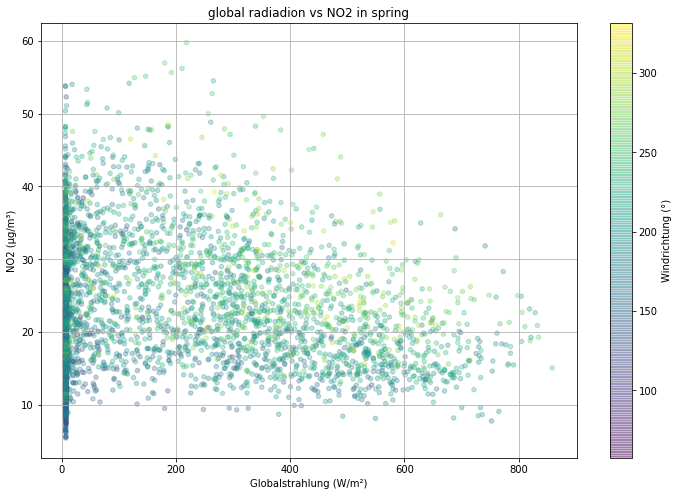

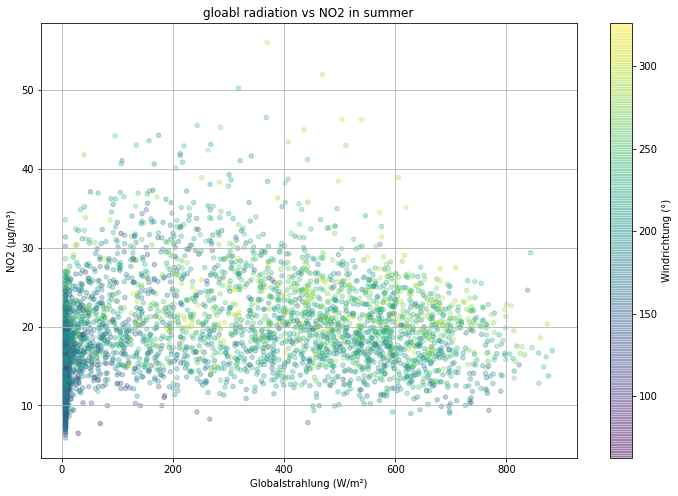

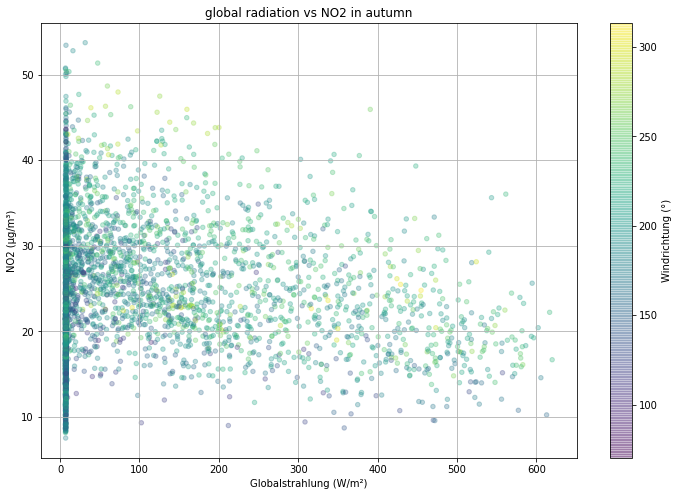

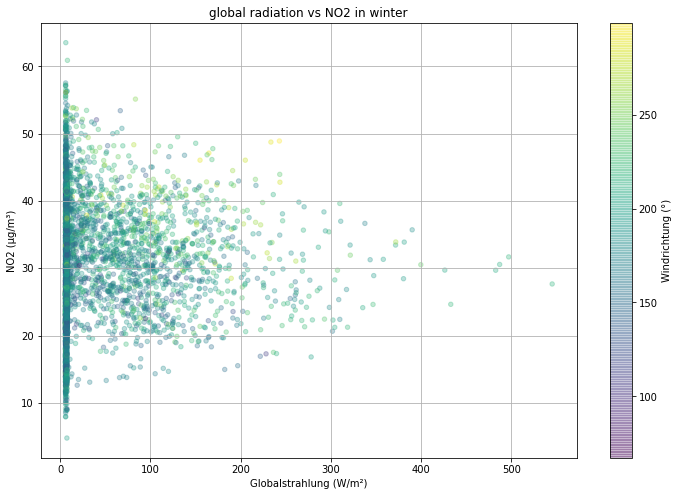

In [60]:
# Globalstrahlung vs NO2

x = df_spring["Globalstrahlung (W/m²)"]
y = df_spring["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_spring.plot.scatter(grid=True, x="Globalstrahlung (W/m²)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
#plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
#plt.legend()
plt.title("global radiadion vs NO2 in spring")
#plt.savefig("linearfitglobno2spring")

x = df_summer["Globalstrahlung (W/m²)"]
y = df_summer["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_summer.plot.scatter(grid=True, x="Globalstrahlung (W/m²)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
#plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
#plt.legend()
plt.title("gloabl radiation vs NO2 in summer")
#plt.savefig("linearfitglobno2summer")

x = df_autumn["Globalstrahlung (W/m²)"]
y = df_autumn["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_autumn.plot.scatter(grid=True, x="Globalstrahlung (W/m²)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
#plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
#plt.legend()
plt.title("global radiation vs NO2 in autumn")
#plt.savefig("linearfitglobno2autumn")

x = df_winter["Globalstrahlung (W/m²)"]
y = df_winter["NO2 (µg/m³)"]
p, pcov = curve_fit(linear, x, y, (-1, 1))
fig,ax=plt.subplots()
df_winter.plot.scatter(grid=True, x="Globalstrahlung (W/m²)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung (°)", cmap="viridis", ax=ax)
#plt.errorbar(x, linear(x, p[0], p[1]), yerr=linear_error(x, pcov), capthick=1., capsize=4., color="darkred", lw=2., label=f"linear fit with a={p[0]:.2f}, b={p[1]:.2f}")
#plt.legend()
plt.title("global radiation vs NO2 in winter")
#plt.savefig("linearfitglobno2winter")

In [61]:
#def excel_time(time):
#    return time.hour / 24.0 + time.minute / (24.0*60.0) + time.second / (24.0*60.0*60.0) + time.microsecond / (24.0*60.0*60.0*1000000.0)

In [62]:
#df_spring["new_time"]=float(input(df_spring["uhrzeit"]))

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

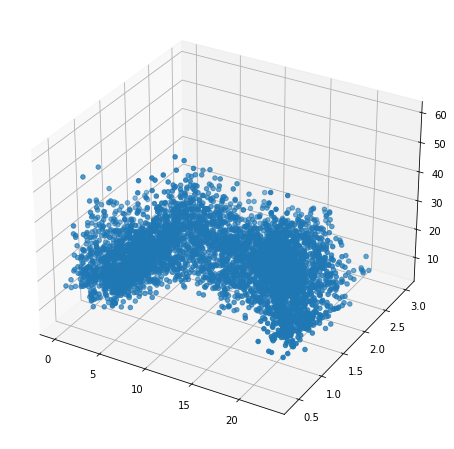

In [63]:
import matplotlib.dates as mdates

#### 3-d Plot
#x1=np.linspace(df_spring[].min(), df_spring[''].max(), len(df_spring[''].unique()))
#x1=np.linspace(df_spring[].min(), df_spring[''].max(), len(df_spring[''].unique()))
fig= plt.figure()
fig=plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter3D( df_spring["uhrzeit"],df_spring['Windgeschwindigkeit (m/s)'], df_spring['NO2 (µg/m³)'])  
#cbar=plt.colorbar(pnt3d)
#cbar.set_label("")
#fig.set_facecolor('white')
#ax.set_facecolor('white')
#plt.xticks()
#plt.yticks()
#myFmt = mdates.DateFormatter('%H:%M:%S')
#ax.xaxis.set_major_formatter(myFmt)
#ax.set_xlabel("")
#ax.set_ylabel("")
#ax.set_zlabel("")
plt.show

In [64]:
seasons={0:"spring", 1:"summer", 2:"autumn", 3:"winter"}
cols=["green", "gold", "saddlebrown", "darkblue"]

def hour_seasons(data, seasons):
    
    hour= data.groupby("hour")
    df_hour= hour.mean()
    return df_hour


In [65]:
conds=[]
time={0:'00:00:00',1:'01:00:00', 2:'02:00:00', 3:'03:00:00', 4:'04:00:00', 5:'05:00:00', 6:'06:00:00', 7:'07:00:00', 8:'08:00:00', 9:'09:00:00', 10:'10:00:00', 11:'11:00:00', 12:'12:00:00', 13:'13:00:00', 14:'14:00:00', 15:'15:00:00', 16:'16:00:00', 17:'17:00:00', 18:'18:00:00', 19:'19:00:00', 20:'20:00:00', 21:'21:00:00', 22:'22:00:00', 23:'23:00:00', 24:'24:00:00'}

for i in range(0,23):
    cond=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[i])
    conds.append(cond)
    

In [76]:
df_spring_hour=df_spring.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_summer_hour=df_summer.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_autumn_hour=df_autumn.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_winter_hour=df_winter.groupby(["hour"])[["NO2 (µg/m³)"]].mean()

df_spring_hour_std=df_spring.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_summer_hour_std=df_summer.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_autumn_hour_std=df_autumn.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_winter_hour_std=df_winter.groupby(["hour"])[["NO2 (µg/m³)"]].std()

df_spring_hour_stand= df_spring_hour_std/(np.sqrt(92))
df_summer_hour_stand= df_summer_hour_std/(np.sqrt(92))
df_autumn_hour_stand= df_autumn_hour_std/(np.sqrt(91))
df_winter_hour_stand= df_winter_hour_std/(np.sqrt(90))

In [77]:
#spring=df_spring_hour.groupby(["hour"])[["NO2 (µg/m³)"]].describe()
#df_spring_hour["std_spring"]=df_spring_hour.groupby(["hour"])[["NO2 (µg/m³)"]].std()
#springstd=df_spring_hour.groupby(["hour"])[["NO2 (µg/m³)"]].std()
#df_spring["std_spring"]=df_spring.groupby(["hour"])[["NO2 (µg/m³)"]].std()
#summer_hour=df_summer.groupby(["hour"])[["NO2 (µg/m³)"]].describe()
#autumn_hour=df_autumn.groupby(["hour"])[["NO2 (µg/m³)"]].describe()
#winter_hour=df_winter.groupby(["hour"])[["NO2 (µg/m³)"]].describe()

In [78]:
#df_spring_hour_stand
#springstd

In [79]:
#spring.plot(y="std", figsize=(10,8))

In [80]:
#def plot_data_and_error(data_x, data_y, error, num_std=1., color="darkblue", define_figure=True, scale_factor=None, label="$NO_2$"):
   # if define_figure:
   #     plt.figure(figsize=(18,10))
   # if scale_factor is not None:
   #     error = error * scale_factor
   # plt.plot(data_x, data_y, color=color, lw=2., label=label)
   # plt.plot(data_x, data_y+num_std*error, color=color, lw=0.5)
   # plt.plot(data_x, data_y-num_std*error, color=color, lw=0.5)
   # plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, color=color, alpha=0.1)
   # plt.grid()
   # plt.xticks(data_x[np.arange(len(data_x))%6==0], ["01:00", "07:00", "13:00", "19:00"])
   # plt.ylabel("$NO_2$")
  #  plt.xlabel("Datum/Uhrzeit")
 #   plt.legend()


#plt.figure(figsize=(18,11))
# winter
#plot_data_and_error(rng_winter, data_smooth_winter, data_error_winter, define_figure=False, scale_factor=scale_factor, 
 #                   label="$NO_2$ (winter)")
# spring
#plot_data_and_error(rng_spring, data_smooth_spring, data_error_spring, define_figure=False, color="darkred", scale_factor=scale_factor, 
  #                  label="$NO_2$ (spring)")
# summer 
#plot_data_and_error(rng_summer, data_smooth_summer, data_error_summer, define_figure=False, color="gold", scale_factor=scale_factor, 
   #                label="$NO_2$ (summer)")
# autumn
#plot_data_and_error(rng_autumn, data_smooth_autumn, data_error_autumn, define_figure=False, color="green", scale_factor=scale_factor, 
    #               label="$NO_2$ (autumn)")
#plt.grid()
#plt.savefig("NO2_season.png")

In [98]:
df_winter_hour["std"] = df_winter_hour_stand["NO2 (µg/m³)"]
df_autumn_hour["std"] = df_autumn_hour_stand["NO2 (µg/m³)"]
df_summer_hour["std"] = df_summer_hour_stand["NO2 (µg/m³)"]
df_spring_hour["std"] = df_spring_hour_stand["NO2 (µg/m³)"]

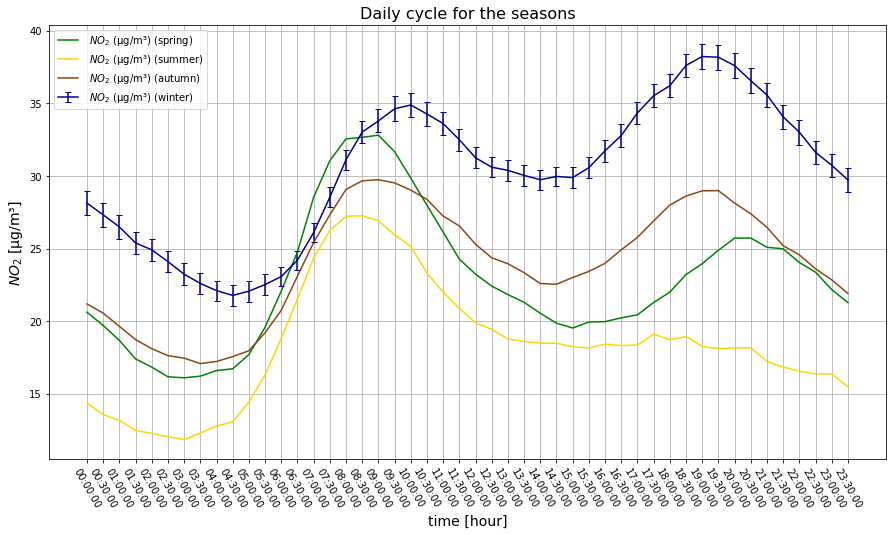

In [97]:
ax=df_spring_hour.plot(grid=True, y="NO2 (µg/m³)",label= f" $NO_{2}$ (µg/m³) ({seasons[0]})", figsize=(15,8),xticks=df_spring_hour.index, c="green", yerr="std", capsize=np.pi )
#plt.plot(data_x, data_y+num_std*error, c="green", lw=0.5)
#plt.plot(data_x, data_y-num_std*error, c="green" lw=0.5)
#plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, c="green", alpha=0.1)
df_summer_hour.plot(grid=True,y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[1]})", ax=ax, c="gold", yerr="std", capsize=np.pi)
#plt.plot(data_x, data_y+num_std*error, c="green", lw=0.5)
#plt.plot(data_x, data_y-num_std*error, c="green" lw=0.5)
#plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, c="green", alpha=0.1)
df_autumn_hour.plot(grid=True, y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[2]})", ax=ax, c="saddlebrown", yerr="std", capsize=np.pi)
#plt.plot(data_x, data_y+num_std*error, c="green", lw=0.5)
#plt.plot(data_x, data_y-num_std*error, c="green" lw=0.5)
#plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, c="green", alpha=0.1)
df_winter_hour.plot(grid=True, y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[3]})", ax=ax, c="darkblue", yerr="std", capsize=np.pi)
#plt.plot(data_y+num_std*error, c="green", lw=0.5)
#plt.plot(data_y-num_std*error, c="green", lw=0.5)
#plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, color="green", alpha=0.1)
ax.set_xlabel('time [hour]', fontsize=14)
ax.set_ylabel('$NO_{2}$ [µg/m³]', fontsize=14)
plt.title("Daily cycle for the seasons", fontsize=16)
ax.set_xticklabels(labels=df_spring_hour.index, rotation=300) #noch andere rotation wählen
plt.savefig("Dailycyclefortheseasons.png")

In [72]:
#time=[df_spring.index]
conds=[]
time={0:'00:00:00',1:'01:00:00', 2:'02:00:00', 3:'03:00:00', 4:'04:00:00', 5:'05:00:00', 6:'06:00:00', 7:'07:00:00', 8:'09:00:00', 9:'09:00:00', 10:'10:00:00', 11:'11:00:00', 12:'12:00:00', 13:'13:00:00', 14:'14:00:00', 15:'15:00:00', 16:'16:00:00', 17:'17:00:00', 18:'18:00:00', 19:'19:00:00', 20:'20:00:00', 21:'21:00:00', 22:'22:00:00', 23:'23:00:00', 24:'24:00:00'}

for i in range(0,23):
    cond=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[i])
    conds.append(cond)
    
    
#cond0=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[0])
#cond1=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[1])
#cond2= (df_spring['Time'].dt.strftime('%H:%M:%S') == '07:30:00')
#cond3= (df_week_spring['Time'].dt.strftime('%H:%M:%S') == '08:00:00')
#cond4=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '08:30:00')
#cond5=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '09:00:00')
#cond6=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '09:30:00')

#cond0e=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '19:30:00')
#cond1e=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '20:00:00')
#cond2e= (df_week_spring['Time'].dt.strftime('%H:%M:%S') == '20:30:00')
#cond3e= (df_week_spring['Time'].dt.strftime('%H:%M:%S') == '21:00:00')
#cond4e=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '21:30:00')
#cond5e=(df_week_spring['Time'].dt.strKasia Lenhardtftime('%H:%M:%S') == '22:00:00')
#cond6e=(df_week_spring['Time'].dt.strftime('%H:%M:%S') == '22:30:00') 

#conds.append(cond0)
spring_hour=[]

for i in range(0,23):
    mask_hour = conds[i]# |cond1|cond2 #|cond5  #cond0 | cond1| |cond6
    df_spring_hour = df_spring.loc[mask_hour] 
    spring_hour.append(df_spring_hour)
#time[0]

In [73]:
#spring_hour

In [74]:
wind_spring=[]
#wind_summer=[]
#wind_autumn=[]
#wind_winter=[]

In [75]:
## für jede Stunde

#Windgeschwindigkeit <2,5 m/s





wind_cond0=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=0.)
wind_cond1=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=2.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=1.)
wind_cond2=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=3.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=2.)
wind_cond3=(spring_hour[i]["Windgeschwindigkeit (m/s)"]>=3.)

wind_conds=[wind_cond0, wind_cond1, wind_cond2, wind_cond3]

for j in range(0,3):
    df_speed=wind_conds[j]
    for i in range(0,23):
        df_low_speed_spring = spring_hour[i].loc[df_speed]
        wind_spring.append(df_low_speed_spring)

no2_spring=[]
#no2_summer=[]
#no2_autumn=[]
#no2_winter=[]
#

no2_cond0=wind_spring[i]["NO2 (µg/m³)"]>=25
no2_cond1=wind_spring[i]["NO2 (µg/m³)"]>=30
no2_cond2=wind_spring[i]["NO2 (µg/m³)"]>=40
#no2_cond=wind_spring[i]["NO2 (µg/m³)"]>=40
no2_conds=[no2_cond0, no2_cond1, no2_cond2]
#hohe NO2 Konzentrationen
for j in range (0,2):
    df_mask_no2=no2_conds[j]
    for i in range(0,23):
        df_high_no2 =wind_spring[i].loc[df_mask_no2]
        no2_spring.append(df_high_no2)
#df_high_no2.shape
#df_low_speed_spring.shape

prozente=[]
for i in range (0,23):
    anzahl_no2=len(no2_spring[i].index)
    anzahl_ges=len(wind_spring[i].index)

    
    try:
        prozent= anzahl_no2/(anzahl_ges/100)
        prozente.append(prozent)
    except ZeroDivisionError:
        prozente.append(0.0)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
## für jede Stunde

#Windgeschwindigkeit <2,5 m/s


laenge_wind_spring=[]


#wind_cond0=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=0.)
#wind_cond1=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=2.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=1.)
#wind_cond2=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=3.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=2.)
#wind_cond3=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=3.)
for i in range(0,23):
    df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=0.)
    df_low_speed_spring = spring_hour[i].loc[df_speed]
    wind_spring.append(df_low_speed_spring)
    laenge_wind_spring.append(len(wind_spring))

laenge_no2_spring=[]
no2_spring=[]
#no2_summer=[]
#no2_autumn=[]
#no2_winter=[]
#

#no2_cond=wind_spring[i]["NO2 (µg/m³)"]>=40
#no2_cond=wind_spring[i]["NO2 (µg/m³)"]>=40
#no2_cond=wind_spring[i]["NO2 (µg/m³)"]>=40
#no2_cond=wind_spring[i]["NO2 (µg/m³)"]>=40

#hohe NO2 Konzentrationen
for i in range(0,23):
    df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
    df_high_no2 =wind_spring[i].loc[df_mask_no2]
    no2_spring.append(df_high_no2)
    laenge_no2_spring.append(len(no2_spring))
#df_high_no2.shape
#df_low_speed_spring.shape

prozente=[]
for i in range (0,23):
    anzahl_no2=len(no2_spring[i].index)
    anzahl_ges=len(wind_spring[i].index)

    
    try:
        prozent= anzahl_no2/(anzahl_ges/100)
        prozente.append(prozent)
    except ZeroDivisionError:
        prozente.append(0.0)
    


In [ ]:
laenge_wind=np.array(laenge_wind_spring)
laenge_no2=np.array(laenge_no2_spring)

In [ ]:
laenge_wind
laenge_no2
stunden=np.array(23)

In [ ]:
laenge_no2

In [ ]:
import pylab
fig=pylab.figure(stunden, laenge_no2, range=[0,23], [0,])
ax=Axes3D(fig)
ax.hist([])
plt.show()

In [ ]:
#anzahl_no2
#anzahl_ges
len(prozente)
#prozente

In [ ]:
# setup the figure and axes
fig = plt.figure(figsize=(18,103))
ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

# fake data
x = np.arange(4)
y = np.arange(0)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1
dx=1
dy=1
dz=1
ax1.bar3d(df_spring["uhrzeit"], df_spring_hour["Windgeschwindigkeit (m/s)"], df_spring_hour["NO2 (µg/m³)"],dx, dy, dz, shade=True)
ax1.set_title('Shaded')

#ax2.bar3d(df_spring["uhrzeit"], df_spring["Windgeschwindigkeit (m/s)"], df_spring["NO2 (µg/m³)"], shade=False)
#ax2.set_title('Not Shaded')

plt.show()


In [ ]:
#dfObj=pd.DataFrame(wind_spring)

In [ ]:
df_spring

In [ ]:
)

In [ ]:
my_date_range = pd.date_range('2019-12-31 00:00:00', periods = 23, freq="H", closed = "right")
df_spring_pro = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': "Temperatur (°C)", "Windgeschwindigkeit (m/s)"}) 

In [ ]:
# dataframe für spring generieren

In [ ]:
for i in range(10):
    div = i % 2
    try:
        print(5/div)
    except ZeroDivisionError:
        print("lol")

In [ ]:
#f_spring_rush

In [ ]:
#cond2

In [ ]:
#df_spring.index[2]
#df_spring

In [ ]:
#conds=[]

#for i in range (0, 48):
#    cond= df_spring == df_spring.index[i]
#    conds.append(cond)
    
    
    
    

In [ ]:
#df_spring_per_hour=df_spring.iloc[1]

#df_spring_per_hour

#len(df_spring_per_hour.index)